Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data into DataFrame

In [5]:
emails_df = pd.read_csv('emails.csv', index_col = 0)

Preview Data

In [6]:
emails_df.head(7)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
Email 6,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,1
Email 7,5,3,1,3,2,1,37,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [7]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5172 entries, Email 1 to Email 5172
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.5+ MB


Check Data for Missing Values

In [8]:
#Check for Missing Values across columns

emails_df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [9]:
#Check for Missing Values Across Rows

emails_df.isna().any(axis=0).sum()

0

Grouping Data According to Spam

In [10]:
emails_grouped = emails_df.groupby('Prediction').count()
emails_grouped

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,3672,3672,3672,3672,3672,3672,3672,3672,3672,3672,...,3672,3672,3672,3672,3672,3672,3672,3672,3672,3672
1,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500


In [11]:
#Max of occurence of a word

emails_grouped.max().unique()

array([3672], dtype=int64)

In [12]:
#Min Occurence of a word

emails_grouped.min().unique()

array([1500], dtype=int64)

In [13]:
emails_df['Prediction'] = emails_df['Prediction'].astype('category')

In [14]:
# Check for count of the word 'the' and 'to'.

emails_df.groupby('Prediction')['to','the'].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_18280\2661526603.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emails_df.groupby('Prediction')['to','the'].count()


,to,the
Prediction,,
0,3672,3672
1,1500,1500


In [15]:
emails_df['the'].median()

3.0

Visualisations

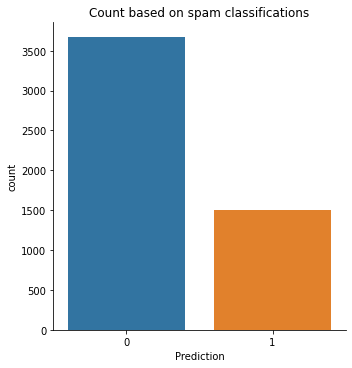

In [16]:
sns.catplot(x = 'Prediction', data = emails_df,
            kind = 'count')
plt.title('Count based on spam classifications')
plt.show();


In [17]:
spam_count = emails_df['Prediction'].value_counts()
spam_count

0    3672
1    1500
Name: Prediction, dtype: int64

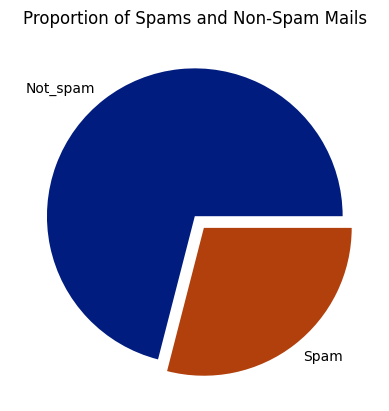

In [18]:
label = ['Not_spam', 'Spam']
explode = [0, 0.1]

palette_color = sns.color_palette('dark')

plt.pie(spam_count, labels = label, colors=palette_color, explode = explode )
plt.title('Proportion of Spams and Non-Spam Mails')
plt.show();